In [ ]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library:
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions:
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

## Сгенерировать данные (датасет) случайным образом:

```text
date_in     | customer_count | country_code | status
----------------------------------------------------
2024-01-01  | 901            | RU           | 1
2024-01-02  | 901            | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
2024-01-01  | 901            | US           | 1
2024-01-02  | 1024           | US           | 2
2024-01-03  | 901            | KZ           | 1
2024-01-04  | 901            | IT           | 3
2024-01-05  | 901            | RU           | 1
2024-01-06  | 901            | RU           | 3
```

для примера будем создавать датасет для диапазона 2024-01-01-2024-02-28 x 4

In [24]:
from numpy import random
from datetime import datetime, date, timedelta

def create_dateset(number_periods=1):
  result = []
  status = [1,2,3]
  start_date = datetime(2023, 1, 1)
  delta = timedelta(days=100)
  country_codes = ['RU', 'Ru', 'US', 'us', 'KZ', 'IT', 'it', 'CA', 'Ca']
  for i in range(number_periods):
    dates_rng = pd.date_range(start=start_date, periods=100, freq='D')
    rand_customer_count = random.randint(low=0, high=1001, size=len(dates_rng))
    rand_status = [status[random.randint(low=0, high=len(status))] for i in range(len(dates_rng))]
    rand_country_codes = [country_codes[random.randint(low=0, high=len(country_codes))] for i in range(len(dates_rng))]
    result.extend(list(zip(dates_rng, rand_customer_count, rand_status, rand_country_codes)))

    start_date = start_date + delta
  return result

In [10]:
pd.date_range?

In [42]:
dataset = create_dateset(10)
dataset.extend(create_dateset(10))
dataset[:10]

[(Timestamp('2023-01-01 00:00:00'), 521, 2, 'CA'),
 (Timestamp('2023-01-02 00:00:00'), 380, 1, 'Ca'),
 (Timestamp('2023-01-03 00:00:00'), 302, 2, 'CA'),
 (Timestamp('2023-01-04 00:00:00'), 626, 3, 'Ru'),
 (Timestamp('2023-01-05 00:00:00'), 430, 2, 'Ca'),
 (Timestamp('2023-01-06 00:00:00'), 69, 3, 'RU'),
 (Timestamp('2023-01-07 00:00:00'), 382, 2, 'US'),
 (Timestamp('2023-01-08 00:00:00'), 985, 3, 'KZ'),
 (Timestamp('2023-01-09 00:00:00'), 73, 2, 'IT'),
 (Timestamp('2023-01-10 00:00:00'), 828, 1, 'it')]

In [43]:
df = pd.DataFrame(data=dataset, columns=['date_in', 'customer_count', 'status', 'country_code'])
df.head(20)

,date_in,customer_count,status,country_code
0,2023-01-01,521,2,CA
1,2023-01-02,380,1,Ca
2,2023-01-03,302,2,CA
3,2023-01-04,626,3,Ru
4,2023-01-05,430,2,Ca
5,2023-01-06,69,3,RU
6,2023-01-07,382,2,US
7,2023-01-08,985,3,KZ
8,2023-01-09,73,2,IT
9,2023-01-10,828,1,it


In [28]:
df.shape

(1000, 4)

In [44]:
df.to_excel('company_stats.xlsx', index=False)

In [45]:
df = pd.read_excel('company_stats.xlsx', 0, index_col='date_in')
df.shape

(2000, 3)

In [32]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2025-09-17', '2025-09-18', '2025-09-19', '2025-09-20',
               '2025-09-21', '2025-09-22', '2025-09-23', '2025-09-24',
               '2025-09-25', '2025-09-26'],
              dtype='datetime64[ns]', name='date_in', length=1000, freq=None)

In [33]:
df.head(20)

,customer_count,status,country_code
date_in,,,
2023-01-01,907,1,RU
2023-01-02,305,3,CA
2023-01-03,348,2,US
2023-01-04,946,3,us
2023-01-05,612,1,Ru
2023-01-06,111,1,Ru
2023-01-07,894,1,RU
2023-01-08,995,1,it
2023-01-09,338,3,KZ


In [34]:
df.dtypes

,0
customer_count,int64
status,int64
country_code,object


In [46]:
df['country_code'] = df.country_code.apply(lambda x: x.upper())
df.head(20)

,customer_count,status,country_code
date_in,,,
2023-01-01,521,2,CA
2023-01-02,380,1,CA
2023-01-03,302,2,CA
2023-01-04,626,3,RU
2023-01-05,430,2,CA
2023-01-06,69,3,RU
2023-01-07,382,2,US
2023-01-08,985,3,KZ
2023-01-09,73,2,IT


In [47]:
# IT -> FR
filter_country_it = df['country_code'] == 'IT'
df['country_code'][filter_country_it] = 'FR'
df.replace('IT', 'FR', inplace=True)
df.head(20)

<ipython-input-47-996a80343d25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country_code'][filter_country_it] = 'FR'


,customer_count,status,country_code
date_in,,,
2023-01-01,521,2,CA
2023-01-02,380,1,CA
2023-01-03,302,2,CA
2023-01-04,626,3,RU
2023-01-05,430,2,CA
2023-01-06,69,3,RU
2023-01-07,382,2,US
2023-01-08,985,3,KZ
2023-01-09,73,2,FR


In [37]:
df['country_code'].unique()

array(['RU', 'CA', 'US', 'FR', 'KZ'], dtype=object)

## Построить график кол-ва клиентов

## Сгруппировать данные по странам, датам. Удалить колонку статус. Отобразить графики кол-ва пользователей по странам. Отобразить только за 2024-й год.

## Найти аномалии
По меcяцам (годам и странам):

- Lower = `x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25))`
- Upper: `x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25))`

## Найти максимум по годам

## Добавить колонку Годовая цель. Отобразить на одном графике.

## Показать как менялось в процентах по годам максимальное значение (yr_pct_change)

<Axes: xlabel='date_in'>

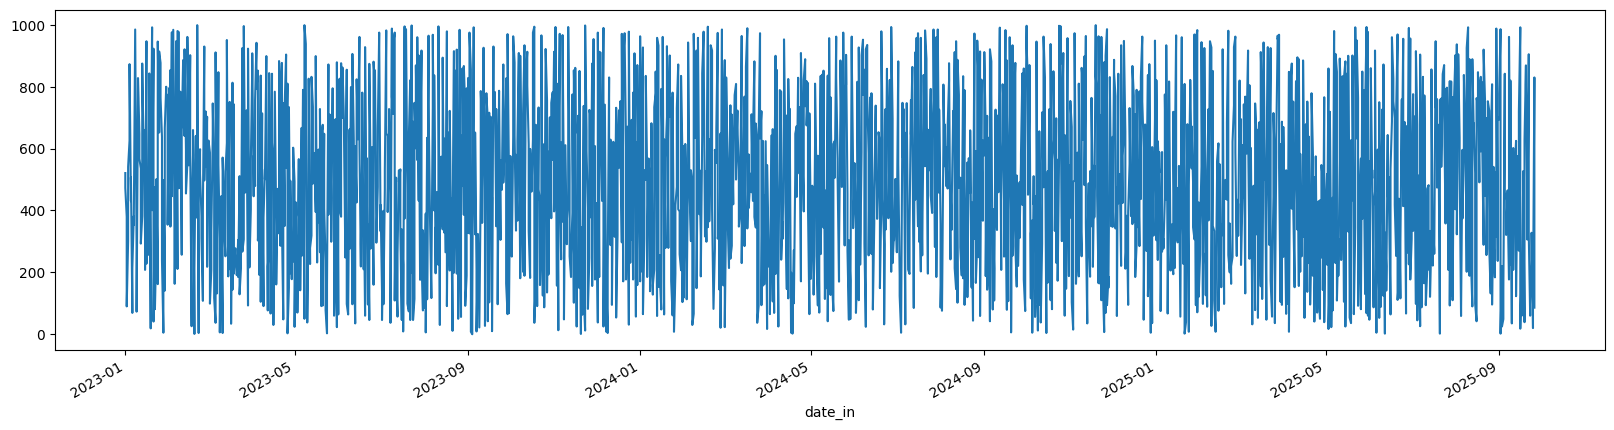

In [48]:
df['customer_count'].plot(figsize=(20, 5))

In [97]:
daily_data = df.reset_index().groupby(['country_code', 'date_in']).sum()
daily_data

customer_count  status
country_code date_in                           
CA           2023-01-01             521       2
             2023-01-02             380       1
             2023-01-03             302       2
             2023-01-05             430       2
             2023-01-07             353       1
...                                 ...     ...
US           2025-09-16             992       1
             2025-09-18             527       1
             2025-09-19              39       2
             2025-09-21             426       2
             2025-09-25              20       3

[1793 rows x 2 columns]

In [98]:
del daily_data['status']

In [99]:
daily_data.index

MultiIndex([('CA', '2023-01-01'),
            ('CA', '2023-01-02'),
            ('CA', '2023-01-03'),
            ('CA', '2023-01-05'),
            ('CA', '2023-01-07'),
            ('CA', '2023-01-12'),
            ('CA', '2023-01-13'),
            ('CA', '2023-01-17'),
            ('CA', '2023-01-18'),
            ('CA', '2023-01-21'),
            ...
            ('US', '2025-09-07'),
            ('US', '2025-09-09'),
            ('US', '2025-09-12'),
            ('US', '2025-09-13'),
            ('US', '2025-09-15'),
            ('US', '2025-09-16'),
            ('US', '2025-09-18'),
            ('US', '2025-09-19'),
            ('US', '2025-09-21'),
            ('US', '2025-09-25')],
           names=['country_code', 'date_in'], length=1793)

In [100]:
daily_data.index.levels[0]

Index(['CA', 'FR', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

In [54]:
daily_data.index.unique(level='country_code')

Index(['CA', 'FR', 'KZ', 'RU', 'US'], dtype='object', name='country_code')

In [61]:
filtered_df = daily_data.query("date_in >= '2024-01-01'")
filtered_df.head()

customer_count
                                   sum
country_code date_in                  
CA           2024-01-01            171
             2024-01-02            544
             2024-01-05           1334
             2024-01-06            515
             2024-01-09            682

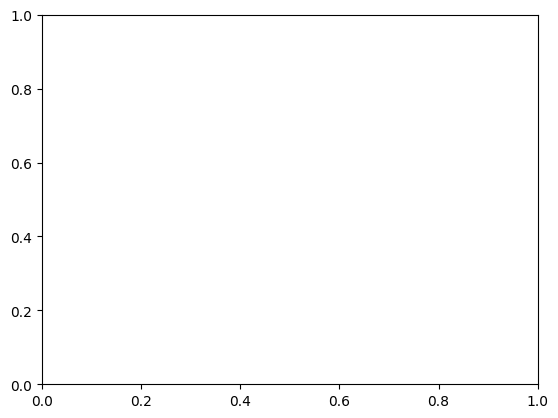

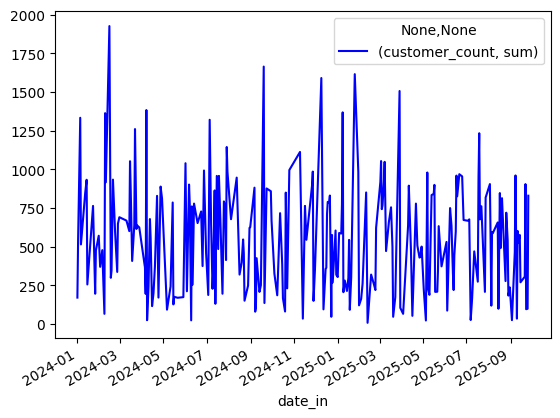

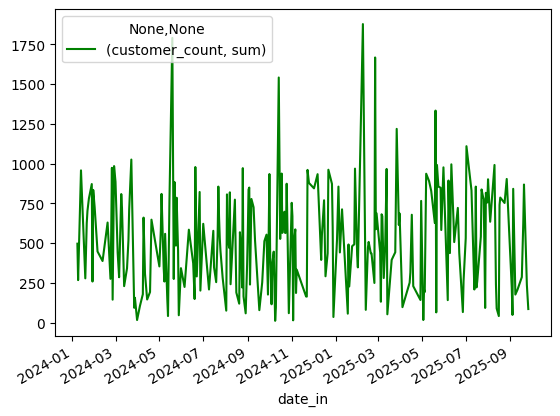

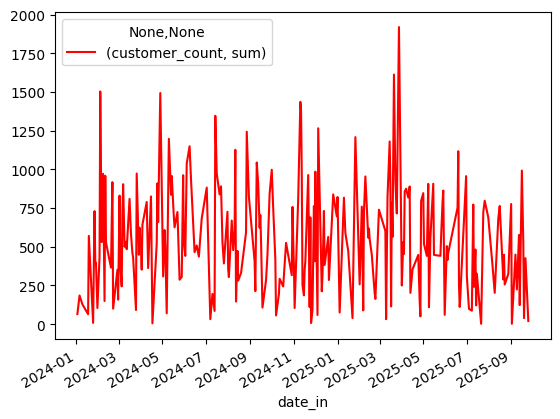

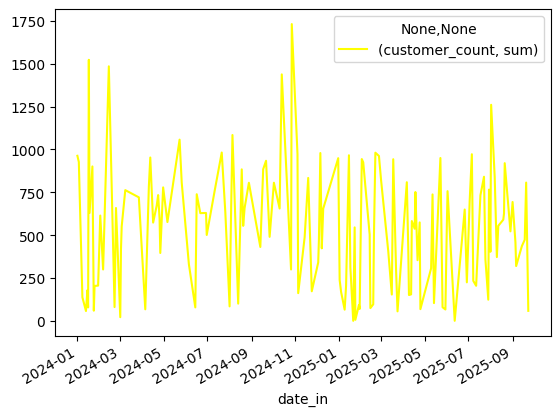

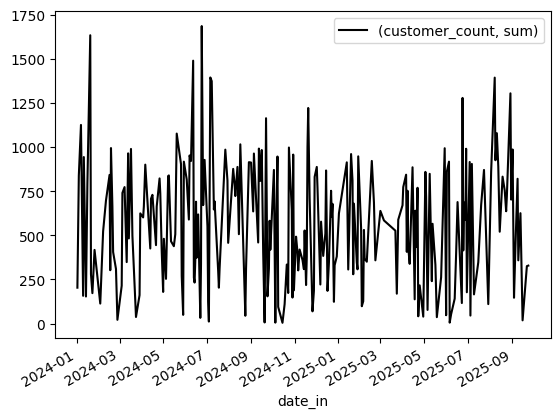

In [59]:
plt.subplots()

daily_data.loc['CA']['2024':].plot(color='blue', label='CA')
daily_data.loc['RU']['2024':].plot(color='green', label='RU')
daily_data.loc['US']['2024':].plot(color='red', label='US')
daily_data.loc['KZ']['2024':].plot(color='yellow', label='KZ')
daily_data.loc['FR']['2024':].plot(color='black', label='FR')

plt.legend(loc='best')

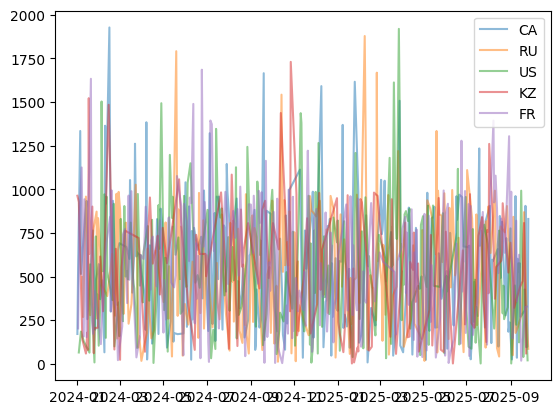

In [83]:
import numpy as np

plt.plot(daily_data.loc['CA']['2024':], alpha=0.5, label='CA')
plt.plot(daily_data.loc['RU']['2024':], alpha=0.5, label='RU')
plt.plot(daily_data.loc['US']['2024':], alpha=0.5, label='US')
plt.plot(daily_data.loc['KZ']['2024':], alpha=0.5, label='KZ')
plt.plot(daily_data.loc['FR']['2024':], alpha=0.5, label='FR')

plt.legend()
plt.show()

In [106]:
groupped_year_month = daily_data.groupby([daily_data.index.get_level_values(0), daily_data.index.get_level_values(1).year, daily_data.index.get_level_values(1).month])
daily_data['lower'] = groupped_year_month['customer_count'].transform(lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)))
daily_data['upper'] = groupped_year_month['customer_count'].transform(lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)))

daily_data['lower'].isnull()

daily_data['outlier'] = (daily_data['customer_count'] < daily_data['lower']) | (daily_data['customer_count'] > daily_data['upper'])
#groupped_year_month.head(10)
daily_data.query('outlier == True')

customer_count    lower     upper  outlier
country_code date_in                                               
CA           2023-01-24            1108 -216.875   980.375     True
             2023-04-11            1755 -524.000  1753.000     True
             2024-05-14             786  -17.250   375.250     True
             2025-01-25            1616 -528.000  1457.500     True
FR           2023-01-10            1591 -217.875  1416.625     True
             2023-04-04            1735 -555.750  1507.250     True
             2023-11-19             851   -9.000   846.250     True
             2025-03-24             169  170.000   944.000     True
KZ           2024-02-14            1484 -386.500  1346.500     True
             2025-01-15             966 -276.750   622.250     True
RU           2023-11-11             993 -117.250   917.000     True
             2024-05-19            1791 -599.000  1640.000     True
             2024-10-14            1542 -253.750  1373.750     True
             2025-02-08            1878 -174.000  1203.500     True
             2025-02-25            1668 -174.000  1203.500     True
US           2023-02-28             921 -126.250   877.750     True
             2023-07-27            1523 -524.250  1339.250     True
             2025-03-28            1919 -298.625  1879.625     True